In [1]:
import cv2
import numpy as np
import glob
import sys
import os
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:

print ("OpenCV:",  cv2.__version__)
print ("Numpy : ", np.__version__)
print ("Python:",  sys.version)

OpenCV: 4.5.1
Numpy :  1.20.1
Python: 3.7.10 (default, Feb 26 2021, 18:47:35) 
[GCC 7.3.0]


In [13]:
from constant import PATHS

ModuleNotFoundError: No module named 'constant'

In [ ]:

import csv
dim = 240*320
X = np.empty((0, dim))
Y = np.empty((0, 4))
with open('train.csv') as csvfile:
    reader = csv.reader(csvfile, delimiter= ',')
    for row in reader:
        X = np.vstack((X, train))
        y = np.vstack((y, ))




In [12]:
import pandas as pd
data = pd.read_csv(PATHS.TRAIN_CSV)

NameError: name 'PATHS' is not defined

In [3]:
# load training data
dim = 240*320
X = np.empty((0, dim))
y = np.empty((0, 4))
training_data = glob.glob(os.path.join(os.getcwd(), 'data_test.npz'))
# print(training_data)
for single_npz in training_data:
    with np.load(single_npz) as data:
        train = data['train']
#         print(data['train'])
        train_labels = data['train_labels']
    X = np.vstack((X, train))
    y = np.vstack((y, train_labels))

print ('Image array shape: ', X.shape)
print ('Label array shape: ', y.shape)

Image array shape:  (10, 76800)
Label array shape:  (10, 4)


In [9]:
training_data

['/home/an.vq/Workspace/SelfDriving/training/data_test.npz']

numpy.ndarray

['train', 'train_labels']

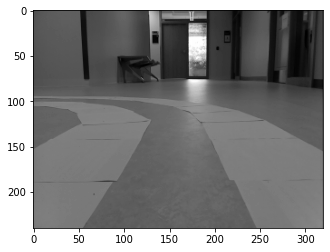

In [13]:
plt.imshow(X[0].reshape(240, 320), cmap='gray')

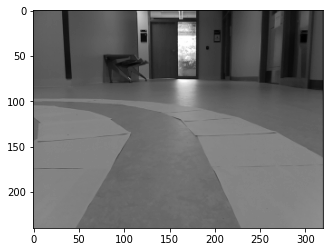

In [15]:
plt.imshow(X[9].reshape(240, 320), cmap='gray')

In [39]:
print(y[0:10])

[[0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]]


In [37]:
# create a neural network
model = cv2.ml.ANN_MLP_create()
layer_sizes = np.int32([dim, 32, 4])
model.setLayerSizes(layer_sizes)
model.setTrainMethod(cv2.ml.ANN_MLP_BACKPROP)
model.setActivationFunction(cv2.ml.ANN_MLP_SIGMOID_SYM, 2, 1)
model.setTermCriteria((cv2.TERM_CRITERIA_COUNT, 20, 0.01))

In [40]:
# training
model.train(np.float32(X), cv2.ml.ROW_SAMPLE, np.float32(y))

True

In [41]:
# evaluate on training data
ret, resp = model.predict(X)
prediction = resp.argmax(-1)
true_labels = y.argmax(-1)

train_rate = np.mean(prediction == true_labels)
print (len(prediction))
print (prediction)
print ('Train accuracy: ', "{0:.2f}%".format(train_rate * 100))

10
[1 1 2 2 2 2 2 2 2 2]
Train accuracy:  80.00%


In [42]:
# save model
model.save('model_test.xml')

In [43]:
# load model
model = cv2.ml.ANN_MLP_load('model_test.xml')

In [44]:
# predict
ret, resp = model.predict(X)
print (len(resp))
resp.argmax(-1)

10


array([1, 1, 2, 2, 2, 2, 2, 2, 2, 2])

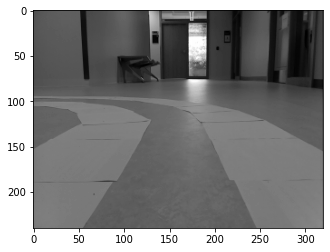

In [49]:
plt.imshow(X[0].reshape(240, 320), cmap='gray')

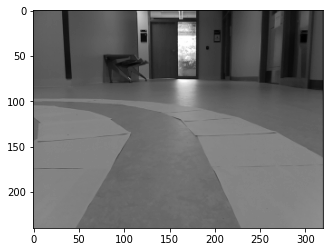

In [50]:
plt.imshow(X[9].reshape(240, 320), cmap='gray')

In [51]:
print(ret)

0.0


In [65]:
print(resp.argmax(-1))
print(resp)
print(np.argmax(resp, axis=1))

[1 1 2 2 2 2 2 2 2 2]
[[-4.31694556e-02  9.99999999e-01  5.59414303e-07 -9.99999999e-01]
 [-4.31694556e-02  9.99999999e-01  5.59414303e-07 -9.99999999e-01]
 [-5.21646291e-01 -1.00000000e+00  1.99999998e+00  1.00000000e+00]
 [-5.21646291e-01 -1.00000000e+00  1.99999998e+00  1.00000000e+00]
 [-5.21646291e-01 -1.00000000e+00  1.99999998e+00  1.00000000e+00]
 [-5.21646291e-01 -1.00000000e+00  1.99999998e+00  1.00000000e+00]
 [-5.21646291e-01 -1.00000000e+00  1.99999998e+00  1.00000000e+00]
 [-5.21646291e-01 -1.00000000e+00  1.99999998e+00  1.00000000e+00]
 [-5.21646291e-01 -1.00000000e+00  1.99999998e+00  1.00000000e+00]
 [-5.21646291e-01 -1.00000000e+00  1.99999998e+00  1.00000000e+00]]
[1 1 2 2 2 2 2 2 2 2]
